HW#2,
Seyed Mohammad kami shirazi,
ID: 862190398,
    PHYS247

Part a)

In [11]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from collections import Counter

In [38]:
tweet=pd.read_csv('tweet_counts.csv')
tweet.head()

,week,count
0,1,39.0
1,2,46.0
2,3,41.0
3,4,42.0
4,5,31.0


In [53]:
def read_datafile(file_name):
    # the skiprows keyword is for heading, but I don't know if trailing lines
    # can be specified
    data = np.loadtxt(file_name, delimiter=',', skiprows=1)
    return data

In [54]:
data = read_datafile('tweet_counts.csv')
data

array([[ 1., 39.],
       [ 2., 46.],
       [ 3., 41.],
       [ 4., 42.],
       [ 5., 31.],
       [ 6., 44.],
       [ 7., 33.],
       [ 8., 42.],
       [ 9., 31.],
       [10., 28.],
       [11., 36.],
       [12., 40.],
       [13., 33.],
       [14., 45.],
       [15., 42.],
       [16., 28.],
       [17., 34.],
       [18., 42.],
       [19., 45.],
       [20., 37.],
       [21., 39.],
       [22., 35.],
       [23., 28.],
       [24., 30.],
       [25., 24.],
       [26., 40.],
       [27., 22.],
       [28., 46.],
       [29., 37.],
       [30., 37.],
       [31., 38.],
       [32., 36.],
       [33., 41.],
       [34., 38.],
       [35., 42.],
       [36., 43.],
       [37., 30.],
       [38., 45.],
       [39., 46.],
       [40., 51.],
       [41., 55.],
       [42., 36.],
       [43., 42.],
       [44., 44.],
       [45., 36.],
       [46., 44.],
       [47., 41.],
       [48., 38.],
       [49., 38.],
       [50., 56.],
       [51., 39.],
       [52., 40.]])

In [138]:
x= data[:,0]
y= data[:,1]
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.])

Text(0.5, 1.0, 'Weekly tweet counts')

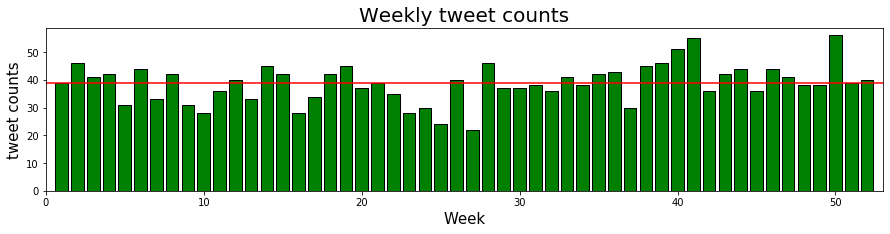

In [182]:
plt.figure(figsize=(15,3))
plt.bar(np.arange(1,53),y, color='green',edgecolor='black')
plt.hlines(avg,0,53,color='red')
plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('tweet counts',fontsize=15)
plt.title('Weekly tweet counts', fontsize=20)

In [60]:
tweet1

array([54, 49, 49, 45, 58, 50, 53, 48, 58, 51, 44, 44, 57, 53, 34, 43, 56,
       55, 53, 46, 55, 62, 51, 54, 49, 41, 52, 53, 57, 48, 60, 62, 59, 53,
       57, 54, 44, 44, 43, 69, 50, 43, 47, 42, 53, 44, 45, 47, 48, 50, 44,
       40])

In [78]:
avg=np.average(y)
avg

38.76923076923077

In [98]:
avg=np.average(y, 0)
avg

38.76923076923077

just practice 

In [69]:
Poisson=lambda k,λ : (λ**k)*np.exp(-λ)/np.math.factorial(k)

In [67]:
t=np.random.poisson(10,100000)

In [88]:
Poisson=np.vectorize(Poisson)
Poisson

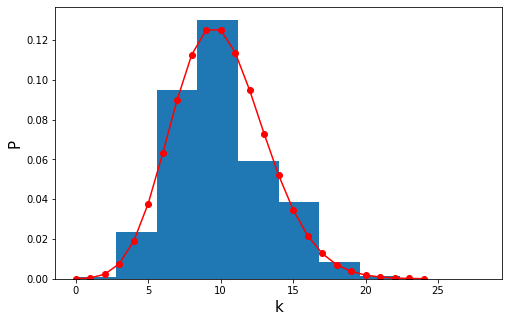

In [86]:
plt.figure(figsize=(8,5))
plt.hist(t, density=True)
plt.plot(np.arange(25),Poisson(np.arange(25),10),c='r', marker='o')
plt.ylabel('P',fontsize=15)
plt.xlabel('k', fontsize=15)
plt.show()

part B)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


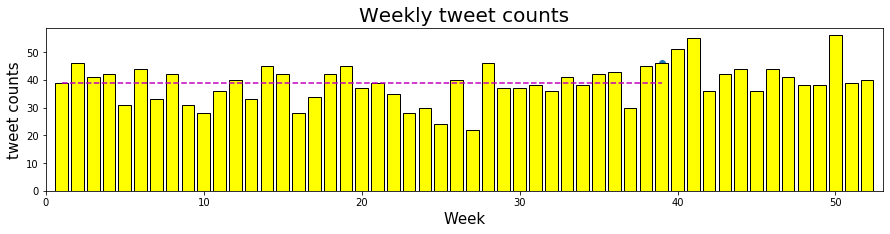

In [169]:
temp_av=[np.average(y)]*len(data[2])

#I dont know how to extend it to 53 array ??

plt.figure(figsize=(15,3))
plt.bar(np.arange(1,53),y, color='yellow',edgecolor='black')

plt.subplot(111)
plt.scatter(data[0],data[1])
plt.plot(data[0],temp_av, "m--")

plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('tweet counts',fontsize=15)
plt.title('Weekly tweet counts', fontsize=20)
plt.show()

part c)

$P(\lambda)=\alpha e^{-\alpha\lambda} $


$E(λ)=\int \lambda P(\lambda) d\lambda$

$E(λ)=\int \lambda P(\lambda) d\lambda= \alpha \int  e^{-\alpha\lambda} \lambda d\lambda$

$=-e^{-\alpha\lambda} \lambda - (e^{-\alpha\lambda}/\alpha) +C$

$=0 -(-1/\alpha)=(1/\alpha)$

part D)

In [176]:
Exp=lambda λ,α:α *np.exp(-α*λ)
Exp=np.vectorize(Exp)
# α is 1/38.7= 0.025

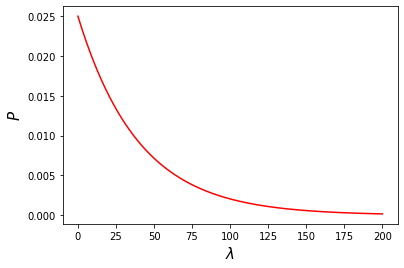

In [177]:
plt.plot(np.linspace(0,200,1000),Exp(np.linspace(0,200,1000),0.025),c='r')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('$P$', fontsize=15)
plt.show()

part E)

In [189]:
λ1_est=np.linspace(25,50,50)
λ2_est=np.linspace(25,50,50)
Ws_est=np.arange(1,53,1)

In [205]:
#y is the tweets and x is the weeks
def Posterior_tweet(λ1_est,λ2_est,Ws_est):
    P=1
    α=avg
    for i in y[x<Ws_est]:
        P=P*Poisson(i, λ1_est)*α *np.exp(-α*λ1_est)
        
    for j in y[x>=Ws_est]:
        P=P*Poisson(j, λ2_est)*α *np.exp(-α*λ2_est)
        
    return (P)

In [238]:
P_=np.array([])
for j in y:
    P_=np.append(P_,Posterior_tweet(j,j,30))

In [258]:
Posterior=Posterior_tweet(λ1_est_mesh,λ2_est_mesh,Ws_est_mesh)

plt.figure(figsize=(8,5))
plt.plot(λ1_est,λ2_est,Posterior)

TypeError: '<' not supported between instances of 'float' and 'vectorize'

part f)

In [247]:
 λ1_est_mesh,λ2_est_mesh, Ws_est_mesh=np.meshgrid(λ1_est,λ2_est,Ws_est)

In [251]:
 λ1_est_mesht=np.vectorize( λ1_est_mesh)
λ2_est_mesht=np.vectorize( λ2_est_mesh)
Ws_est_mesh=np.vectorize( Ws_est_mesh)

In [257]:
Posterior

0.0